In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [2]:
#plotting funtion - it takes the entire data and plots the points with label - 1 and label-0 separately
#it also plots the data through scatter plots
def plot_f(data,labels,title,x,y):
    plt.figure(figsize = (14,9))
    P = []
    Q = []
    for i in range(0,len(data)):
        list = []
        if(labels[i] == 1):
            list.append(data[i][0])
            list.append(data[i][1])
            P.append(list)
        else :
            list.append(data[i][0])
            list.append(data[i][1])
            Q.append(list)
    P=torch.tensor(P)
    Q=torch.tensor(Q)
    plt.plot(x,y,'-r',label = 'W')
    plt.scatter(P[:,0],P[:,1],s=3)
    plt.scatter(Q[:,0],Q[:,1],s=3)
    plt.title(title)
    plt.grid()
    plt.show()

In [3]:
# hinge loss = max(0,1-(w.T.x)*y)
# here loss will be of the form - max(0,1-(w1x1+w2x2+w3x3)*y)
def hinge_loss(y,w,x):
    if(x.dot(w)*y < 1):
        return 1-x.dot(w)*y
    return 0
# evaluates gradient of a batch of size 64
# gradient is 0 when loss is 0(for hinge loss)
# here gradient is [-x1y,-x2y,-x3y] when (w1x1+w2x2+w3x3)*y < 1
def eval_grad(x,y,batch_size,w):
    grad = torch.zeros_like(w) #if loss is 0 the gradient remains 0 else updates
    for i in range(0,x.size(0)):
        if hinge_loss(y[i],w,x[i])>0 : # gradient update equation 
            grad[0] = grad[0]-x[i][0]*y[i]
            grad[1] = grad[1]-x[i][1]*y[i]
            grad[2] = grad[2]-x[i][2]*y[i]
    return grad/x.size(0)

In [9]:
#the line I considered to generate data
class Generate_line:
    a = 0 
    b = 0
    c = 0
    def __init__(self,array):
        self.a = array[0]
        self.b = array[1]
        self.c = array[2]


In [10]:
#generate line randomly
torch.manual_seed(20)
a = torch.randint(1,5,(1,))
b = torch.randint(1,5,(1,))
c = torch.randint(-50,-45,(1,))
my_tensor = torch.tensor([a,b,c])
my_line = Generate_line(my_tensor)
my_tensor

tensor([  4,   3, -48])

In [4]:
# batch gradient descent of batch size-64
def train_grad(x,y,w,nb_max_epochs):
    l = 0.05 # learning factor
    for i in range(0,nb_max_epochs):
        a =0
        batch_size = 64
        b = batch_size
        while b<=x.size(0) :# a,b are two pointers to divide the data into batches of size <=64
            gradient = eval_grad(x[a:b],y[a:b],batch_size, w)
            w = w - l * gradient #update equation
            a = b
            if(a >= x.size(0)):
                break
            if b+batch_size > x.size(0):
                b = x.size(0)
            else :
                b = b + batch_size
    return w

In [11]:
# create data function - it generates 3000 points between 0 and 1 and scales it to 15 so that points lie between 0 and 15
#then it removes the points which are less than gamma distance from my_line.
def create_data(gamma):
    data = torch.rand(3000,2)*20
    denom = torch.sqrt((my_line.a)**2+(my_line.b)**2)
    count = 0 #counts the number of points which are not removed 
    X=torch.empty(3000,3).fill_(1)
    X_new=torch.empty(3000,3).fill_(1)#takes all the points in X which are not removed
    Y=torch.ones(3000,1).fill_(1)# takes all the labels of the points in X which are not removed
    X[:,:2]=data
    for i in range(0,3000):
        val = my_line.c + my_line.a*data[i][0] + my_line.b*data[i][1]
        if val/denom > gamma:
            X_new[count][0] = X[i][0]
            X_new[count][1] = X[i][1]
            Y[count][0] = 1
            count = count+1
        elif val/denom < -gamma:
            X_new[count][0] = X[i][0]
            X_new[count][1] = X[i][1]
            Y[count][0] = -1
            count = count+1
    X = torch.tensor
    X = X_new[:count,:]#taking the points in X_new till count because X_new has extra tensor[1,1,1] elements
    Y = Y[:count]#taking the points in Y till count because X_new has extra tensor[1] elements
    plot_f(X,Y,'Data points',[],[])
    W = torch.zeros(X.size(1))#initializing the weight as zeros
    plot_f(X,Y,'Graph of W before training',np.linspace(0,22,100),np.zeros(100,))
    return X,Y,W


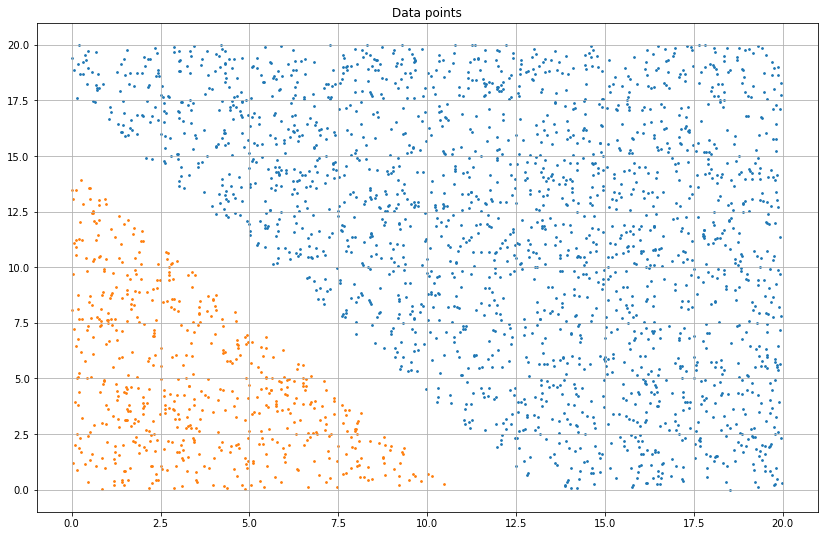

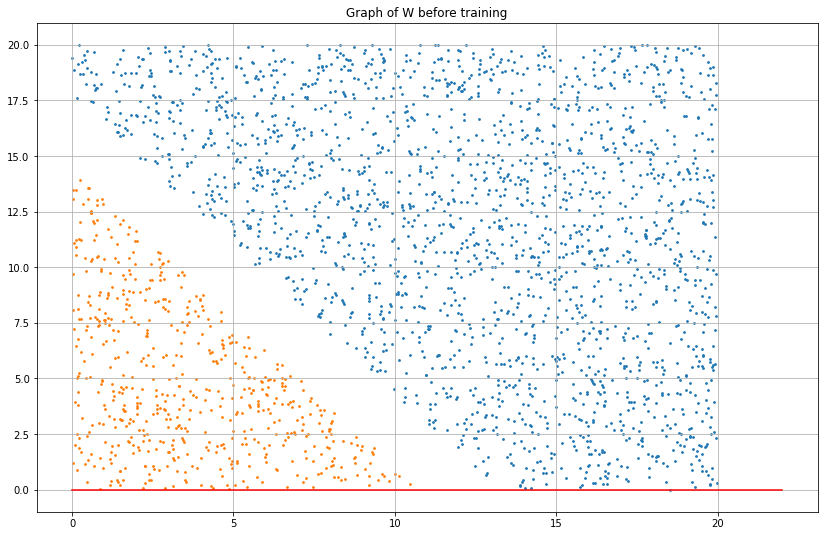

tensor([ 0.6135,  0.4651, -6.8462])


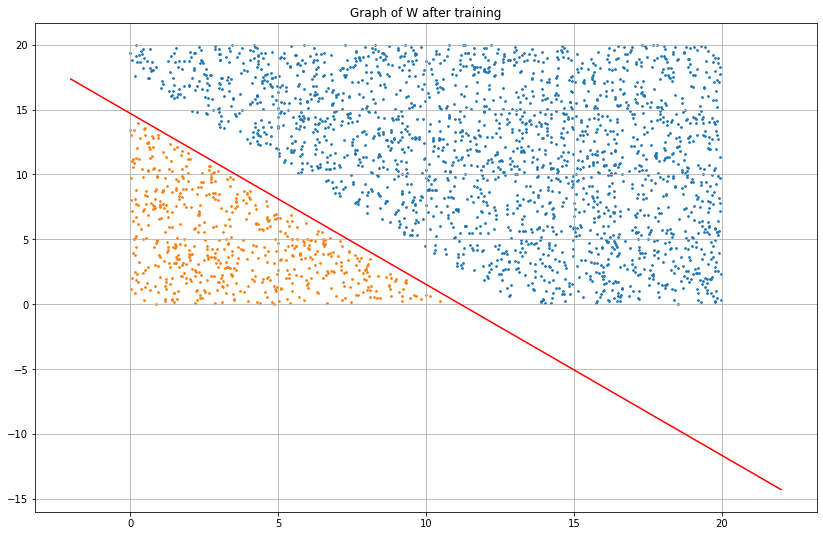

In [12]:
X,Y,W=create_data(1)
#number of epochs = 200
W= train_grad(X[0:2000],Y[0:2000],W,200)#considering 0 to 1999 points as training data
print(W)
x = np.linspace(-2,22,100)
y = -(W[0]/W[1])*x - (W[2]/W[1])
plot_f(X,Y,'Graph of W after training',x,y)

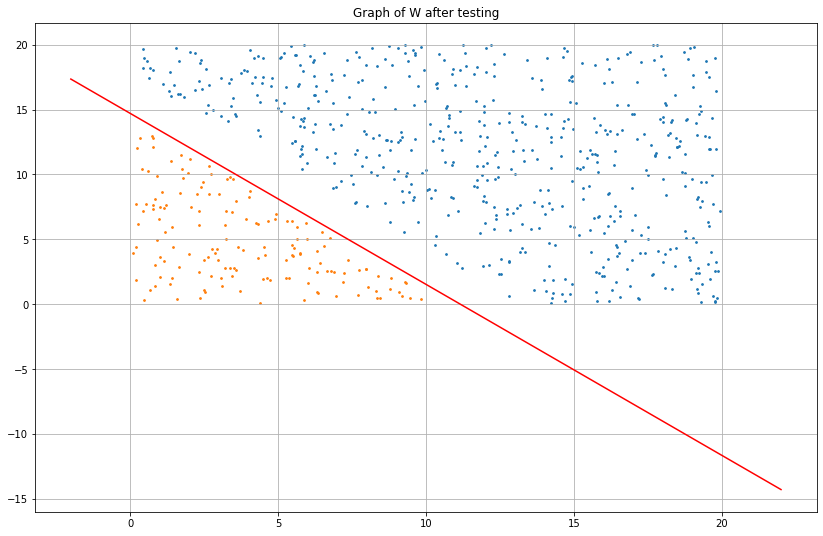

In [13]:
#taking 2000 t0 3000(index) points as testing data
plot_f(X[2000:],Y[2000:],'Graph of W after testing',x,y)